<a href="https://colab.research.google.com/github/finloop/programowanie-liniowe/blob/main/Program-liniowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programowanie liniowe z pomocą Python'a
 Ten notebook ma na celu pokazanie jak można rozwiązywać program liniowy z pomocą biblioteki `SciPy`. Zacznę od rozwiązania przykładowego zadania oraz pokażę w jaki sposób interpretować wyniki zwracene przez program. Następnie każdy kolejny przykład utrudnię zwiększając liczbę zmiennych oraz wprowadzając sprzeczności.





## Program liniowy w SciPy
Z dokumentacji biblioteki `SciPy` odczytać możemy w jakiej postaci przyjmuje ona problemy w postaci: $$\min_x \ c^T x \\  
A_{ub} x \leq b_{ub},\\ 
A_{eq} x = b_{eq},\\ 
l \leq x \leq u$$
Gdzie:
*   $\min_x \ c^T x$ to funkcja celu
*   $x$ to wektor zmiennych decyzyjnych
*   $c^T$ to macierz transponowana do macierzy jednokolumnowej C tzn. $c^T = [c_1, \dots , c_n]$
*   $A_{ub}$ - wiersze macierzy ograniczeń dla, których ograniczenie jest w postaci $\leq$
*   $b_{ub}$ - ograniczenia górne dla wierszy $A_{ub}$
*   $A_{eq}$ - wiersze macierzy ograniczeń dla, których ograniczenie jest w postaci $ = $
*   $b_{eq}$ - ograniczenia dla wierszy $A_{eq}$
*   $l$ dolne ograniczenie dla $x$ domyślnie $0$

Można zauważyć, że nie każdy problem tak od razu będzie można rozwiązać z pomocą `SciPy` (niektóre będą wymagały przekształceń), ale zaletą jest to, że wszystkie dane podajemy w postaci macierzy, które posiadaja bardzo rozbudowany interfejs w Pythonie.


## Przykładowe zadanie
Rozważmy następujący program liniowy:
$$\begin{cases} -2x_1 + 4x_2 \rightarrow max  \\
2x_1 + 3x_2 \geq 3 \\
-4x_1 + 2x_2 \leq 5 \\
0 \leq x_1, x_2   \end{cases} $$
Sprowadzam go do problemu minimalizacji:
$$\begin{cases} 2x_1 - 4x_2 \rightarrow min  \\
-2x_1 - 3x_2 \leq -3 \\
-4x_1 + 2x_2 \leq 5 \\
0 \leq x_1, x_2   \end{cases} $$
zadanie w takiej formie możemy już przetworzyć z pomocą `SciPy`. Takie przekształcenie możemy wykonać z pomocą pythona, co znacznie przyspiesza pracę dla dużych macierzy.

In [2]:
import numpy as np # Biblioteka obsługująca macierze
from scipy.optimize import linprog # Fukcja z SciPy do rozwiązywania programu liniowego

# Wprowadzenie macierzy kosztów
A_ub = np.array([[2, 3],
                 [-4, 2]])

# Pomnożenie pierwszego wiersza (w pythonie indeksujemy od 0) przez -1
A_ub[0, :] = A_ub[0,:] * -1
A_ub

array([[-2, -3],
       [-4,  2]])

In [3]:
# Wprowadzenie ograniczeń górnych
b_ub = np.array([3,5])

# Pomnożenie pierwszego elementu przez -1
b_ub[0] = b_ub[0] * -1
b_ub

array([-3,  5])

In [4]:
# Wprowadzenie wektora c
c = np.array([-2, 4])

# Przemnożenie wektora c przez -1
c = c * -1
c

array([ 2, -4])

In [5]:
# Rozwiązanie
wynik = linprog(c=c, A_ub=A_ub, b_ub=b_ub)
wynik 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


     con: array([], dtype=float64)
     fun: -4313094417.980653
 message: 'The algorithm terminated successfully and determined that the problem is unbounded.'
     nit: 4
   slack: array([1.16918256e+10, 5.09231405e+09])
  status: 3
 success: False
       x: array([2.41628708e+09, 2.28641715e+09])

### Interpretacja wyniku
*    **con** różnica między $b_{eq} - A_{eq}x$
*    **fun** wartość funkcji celu
*    **messge** status zwrócony przez fukcję
*    **nit** ilość iteracji
*    **slack** różnica między $b_{ub} - A_{ub}x$
*    **status** jest to jedna z wartości:
    0. Optymalizacja zakończona sukcesem
    1. Przekroczono limit iteracji
    2. Problem jest sprzeczny
    3. Problem jest nieograniczony
    4. Problem z obliczeniami
*    **success** przyjmuje wartość `True` jeżeli znaleziono rozwiązanie optymalne
*    **x** wartości zmiennych decyzyjnych

Program twierdzi, że program linowy jest nieograniczony. Przykład ten zawiera wyłącznie dwie zmienne, możemy go zatem łatwo narysować.

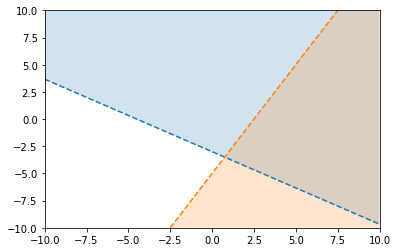

In [43]:
import matplotlib.pyplot as plt   

def abline(A, B, C, between):
    """Rysuje linię w postaci ogólnej"""
    slope = -A/B
    intercept = -C
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.fill_between(x_vals, y_vals, between, alpha=0.2)

plt.xlim((-10,10))
plt.ylim((-10,10))

abline(2,3,3,10)
abline(-4,2,5,-10)  

# Rozwiązywanie problemu w postaci kanonicznej

Dla zadania w postaci kanonicznej będziemy korzystać wyłącznie z części:
$$\min_x \ c^T x \\  
A_{eq} x = b_{eq},\\ 
0 \leq x $$



Rozważmy program liniowy w postaci kanonicznej zapisany w następujący sposób:
$$\begin{cases}-2 x_1 + -1x_2 \rightarrow min, \\
3x_1 + 4x_2 = 5,  \\
5x_1 + 5x_2 + x_3 = 10,  \\
x_1 + x_4 = 20,  \\
x_1 + 2x_2 + x_5 = 20,  \\
x_1,x_2, x_3,x_4 ,x_5 \geq 0
\end{cases}$$
Jego rozwiązanie wygląda następująco:

In [48]:
A = np.array([[3, 4, 0, 0, 0],
              [5, 5, 1, 0, 0],
              [1, 0, 0, 1, 0],
              [1, 2, 0, 0, 1]])

b = np.array([5, 10, 20, 20])

c = np.array([-2, -1, 0, 0, 0])

wynik2 = linprog(c, A_eq=A, b_eq=b, method='simplex')
wynik2

     con: array([0., 0., 0., 0.])
     fun: -3.3333333333333335
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 1.66666667,  0.        ,  1.66666667, 18.33333333, 18.33333333])